<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [4]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
data=pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'profit in $10000s vs city population in 10000s')

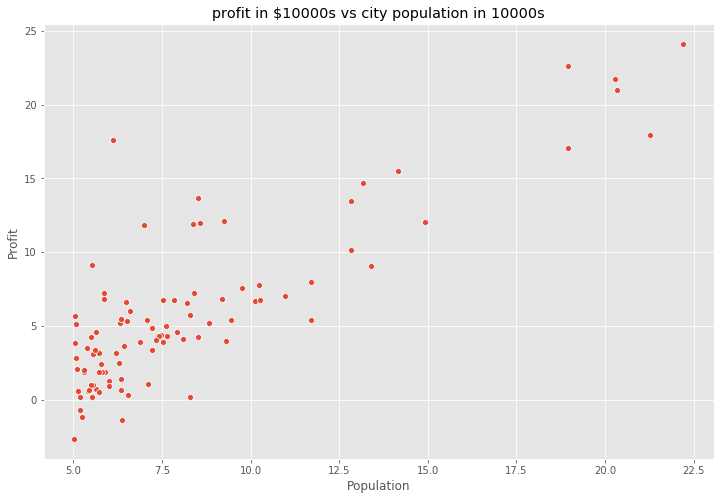

In [8]:
ax=sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title("profit in $10000s vs city population in 10000s")

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [11]:
def cost_function(x,y,theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred-y)**2
    return 1/(2*m)*np.sum(error)


In [12]:
m = data.Population.values.size
X= np.append(np.ones((m,1)),data.Population.values.reshape(m,1),axis = 1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [14]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta-=alpha*1/m*error
        costs.append(cost_function(X,y,theta))
    return theta, costs

In [15]:
theta,costs=gradient_descent(X,y,theta,alpha=0.01,iterations=2000)
print("h(x)={}+{}x1".format(str(round(theta[0,0],2)),
                           str(round(theta[1,0],2))))

h(x)=-3.79+1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [17]:
from mpl_toolkits.mplot3d import Axes3D


In [21]:
theta_0=np.linspace(-10,10,100)
theta_1= np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_function(X,y,t)

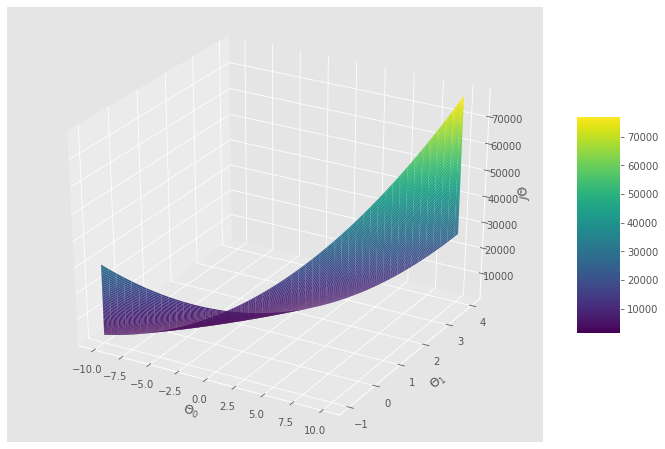

In [22]:
fig = plt.figure(figsize=(12,8))
ax=fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap ='viridis')
fig.colorbar(surf,shrink = 0.5,aspect = 5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$j\Theta$")

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the cost fucntion over iterations of gradient descent')

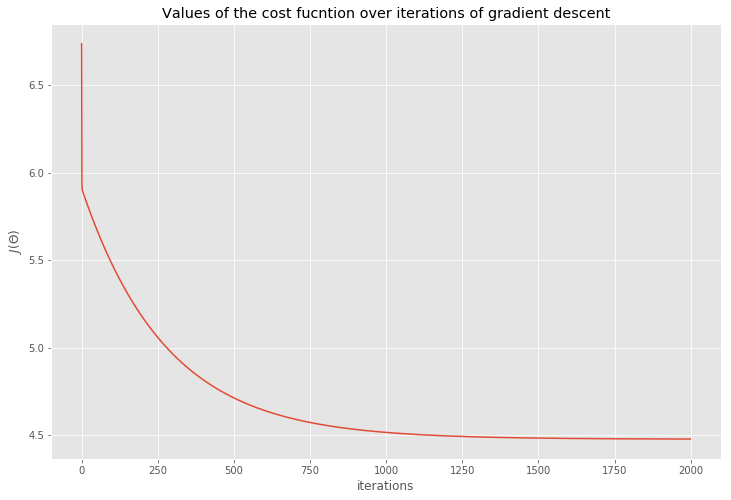

In [23]:
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the cost fucntion over iterations of gradient descent")

### Task 8: Training Data with Linear Regression Fit
---

In [24]:
theta.shape

(2, 1)

In [25]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear regression Fit')

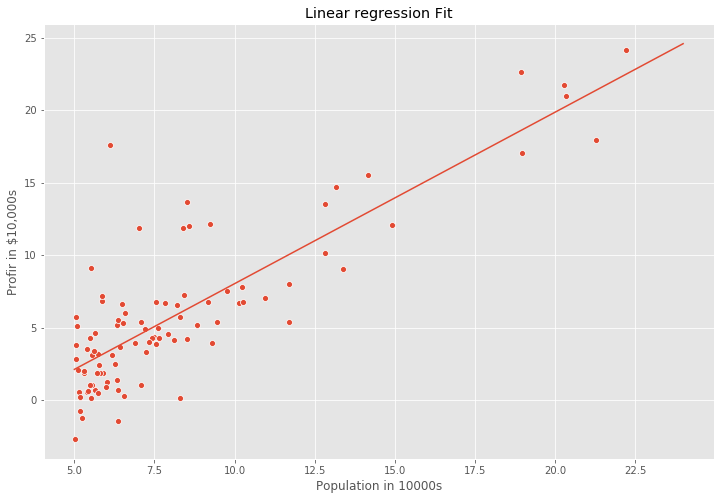

In [27]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population',y="Profit",data=data)
x_value = [x for x in range(5,25)]
y_value =[(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profir in $10,000s")
plt.title("Linear regression Fit")

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [38]:
def predict(X,theta):
    y_predict = np.dot(theta.transpose(),X)
    return y_predict

In [40]:
y_pred_1 = predict(np.array([1,4]),theta)*10000
print("For a population of 40000 people,the model predicts a profit of $  "+ str(round(y_pred_1,0)))


For a population of 40000 people,the model predicts a profit of $  9408.0


In [42]:
y_pred_2 = predict(np.array([1,8.3]),theta)*10000
print("For a population of 83000 people,the model predicts a profit of $  "+ str(round(y_pred_2,0)))


For a population of 83000 people,the model predicts a profit of $  60243.0
